Building a CNN model using Tensorflow & Keras to train a classifier to predict the MNIST hand written digits. 

Loading Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

LOADING MNIST DATASET

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

Normalising the data

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

We will also reshape the images to add a channel dimension to convert from grayscale to RGB

In [9]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

Defining the model architecture

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=sgd_optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_sgd = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

model.compile(optimizer=adam_optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_adam = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

model.compile(optimizer=rmsprop_optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_rmsprop = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4960 - accuracy: 0.8584 - val_loss: 0.1421 - val_accuracy: 0.9591
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1357 - accuracy: 0.9586 - val_loss: 0.1381 - val_accuracy: 0.9555
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0941 - accuracy: 0.9709 - val_loss: 0.0750 - val_accuracy: 0.9776
Epoch 4/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0761 - accuracy: 0.9761 - val_loss: 0.0701 - val_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0517 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0568 - accuracy: 0.9825 - val_loss: 0.0550 - val_accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0539 -

Plotting the training and validation accuracy for each optimizer

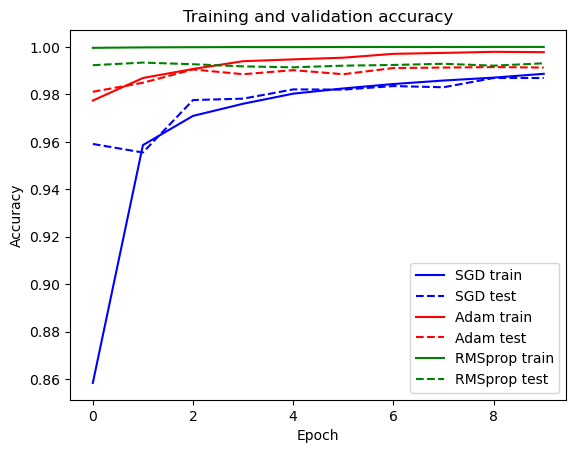

In [12]:
plt.plot(history_sgd.history['accuracy'], label='SGD train', color='blue')
plt.plot(history_sgd.history['val_accuracy'], label='SGD test', color='blue', linestyle='dashed')
plt.plot(history_adam.history['accuracy'], label='Adam train', color='red')
plt.plot(history_adam.history['val_accuracy'], label='Adam test', color='red', linestyle='dashed')
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop train', color='green')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop test', color='green', linestyle='dashed')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()